# CS 5526 Data Analytics Project

#### Wenjun Han


### Data Cleaning

In [2]:
# Import library and data table that are needed

import pandas as pd
import numpy as np

underlying_disease_org = pd.read_excel("cdc_underlying disease by county.xlsx")
gdp_org = pd.read_excel("gdp_dollars.xlsx")
population_org = pd.read_csv("co-est2019-population by county.csv", encoding = "ISO-8859-1")
poverty_org = pd.read_csv("covid_data_log_200908.csv")
icu_org = pd.read_csv("data-FPBfZ.csv")
case_death_org = pd.read_csv("death and case number.csv")

In [3]:
# Read each data table and only select the data that we need - case and death
case_death_2_1_2021 = case_death_org[case_death_org['date']=="2/1/2021"]
case_death_2_1_2021 = case_death_2_1_2021[['county','state','cases','deaths']]
case_death_2_1_2021 

,county,state,cases,deaths
985344,Autauga,Alabama,5683,69.0
985345,Baldwin,Alabama,18211,224.0
985346,Barbour,Alabama,1956,40.0
985347,Bibb,Alabama,2309,52.0
985348,Blount,Alabama,5720,100.0
...,...,...,...,...
988586,Sweetwater,Wyoming,3503,32.0
988587,Teton,Wyoming,3146,6.0
988588,Uinta,Wyoming,1968,12.0
988589,Washakie,Wyoming,865,25.0


In [4]:
# Read each data table and only select the data that we need - underlying disease
underlying_disease = underlying_disease_org[["COUNTY_NAME","STATE_NAME","Obesity_prevalence",
                                           'Heart disease_prevalence','COPD_prevalence','diabetes_prevalence',
                                           'CKD_prevalence']]
underlying_disease.columns = ['county', 'state','obesity','heart_disease','COPD','diabetes','CKD']
underlying_disease

,county,state,obesity,heart_disease,COPD,diabetes,CKD
0,Autauga,Alabama,35.8,7.9,8.6,12.9,3.1
1,Baldwin,Alabama,29.7,7.8,8.6,12.0,3.2
2,Barbour,Alabama,40.7,11.0,12.1,19.7,4.5
3,Bibb,Alabama,38.7,8.6,10.0,14.1,3.3
4,Blount,Alabama,34.0,9.2,10.5,13.5,3.4
...,...,...,...,...,...,...,...
3137,Sweetwater,Wyoming,33.6,5.9,6.6,8.9,2.6
3138,Teton,Wyoming,19.4,5.2,4.9,7.2,2.4
3139,Uinta,Wyoming,34.2,7.2,8.0,10.4,3.0
3140,Washakie,Wyoming,28.4,8.2,8.3,11.3,3.4


In [5]:
# Read each data table and only select the data that we need - gdp

# Reformat the gdp data by operating in excel
gdp_org = pd.read_excel("gdp_dollars.xlsx")
gdp_org

,county,state,gdp _dollars
0,Autauga,Alabama,1501769
1,Baldwin,Alabama,6140514
2,Barbour,Alabama,762856
3,Bibb,Alabama,389547
4,Blount,Alabama,869049
...,...,...,...
3085,Sweetwater,Wyoming,3861073
3086,Teton,Wyoming,2250191
3087,Uinta,Wyoming,926327
3088,Washakie,Wyoming,369344


In [6]:
# State name dictionary
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [7]:
# Read each data table and only select the data that we need - poverty
poverty = poverty_org[['County','State','Poverty']]
poverty.columns = ['county', 'state','poverty']
poverty['state'].replace(states,inplace=True) # Change the state initials to full state name
poverty

D:\Anaconda\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,county,state,poverty
0,Autauga,Alabama,10.916415
1,Baldwin,Alabama,12.279579
2,Barbour,Alabama,9.997843
3,Bibb,Alabama,9.914032
4,Blount,Alabama,10.954973
...,...,...,...
3137,Sweetwater,Wyoming,10.650294
3138,Teton,Wyoming,10.038368
3139,Uinta,Wyoming,9.910215
3140,Washakie,Wyoming,8.953511


In [8]:
# Read each data table and only select the data that we need - icu, population
icu = icu_org
icu.columns = ['state','county','icu beds','total population','population aged 60+',
                      'percent of population aged 60+','residents aged 60+ per each icu bed']
icu

,state,county,icu beds,total population,population aged 60+,percent of population aged 60+,residents aged 60+ per each icu bed
0,Alabama,Autauga,6,55036,10523,19.1,1754.0
1,Alabama,Baldwin,51,203360,53519,26.3,1049.0
2,Alabama,Barbour,5,26201,6150,23.5,1230.0
3,Alabama,Bibb,0,22580,4773,21.1,NaN
4,Alabama,Blount,6,57667,13600,23.6,2267.0
...,...,...,...,...,...,...,...
3137,Wyoming,Sweetwater,10,44527,7015,15.8,702.0
3138,Wyoming,Teton,6,22923,4298,18.7,716.0
3139,Wyoming,Uinta,6,20758,3554,17.1,592.0
3140,Wyoming,Washakie,0,8253,2206,26.7,NaN


### Data Fusion

In [144]:
# Merge all the data above into a single table
data = pd.merge(icu, gdp_org, on=['state','county'])
data = pd.merge(data, case_death_2_1_2021 , on=['state','county'])
data = pd.merge(data, underlying_disease , on=['state','county'])
data = pd.merge(data, poverty, on=['state','county'])

In [145]:
# Check with the data
data

,state,county,icu beds,total population,population aged 60+,percent of population aged 60+,residents aged 60+ per each icu bed,gdp _dollars,cases,deaths,obesity,heart_disease,COPD,diabetes,CKD,poverty
0,Alabama,Autauga,6,55036,10523,19.100,"1,754.000",1501769,5683,69.000,35.800,7.900,8.600,12.900,3.100,10.916
1,Alabama,Baldwin,51,203360,53519,26.300,"1,049.000",6140514,18211,224.000,29.700,7.800,8.600,12.000,3.200,12.280
2,Alabama,Barbour,5,26201,6150,23.500,"1,230.000",762856,1956,40.000,40.700,11.000,12.100,19.700,4.500,9.998
3,Alabama,Bibb,0,22580,4773,21.100,nan,389547,2309,52.000,38.700,8.600,10.000,14.100,3.300,9.914
4,Alabama,Blount,6,57667,13600,23.600,"2,267.000",869049,5720,100.000,34.000,9.200,10.500,13.500,3.400,10.955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,Wyoming,Sweetwater,10,44527,7015,15.800,702.000,3861073,3503,32.000,33.600,5.900,6.600,8.900,2.600,10.650
2963,Wyoming,Teton,6,22923,4298,18.700,716.000,2250191,3146,6.000,19.400,5.200,4.900,7.200,2.400,10.038
2964,Wyoming,Uinta,6,20758,3554,17.100,592.000,926327,1968,12.000,34.200,7.200,8.000,10.400,3.000,9.910
2965,Wyoming,Washakie,0,8253,2206,26.700,nan,369344,865,25.000,28.400,8.200,8.300,11.300,3.400,8.954


In [146]:
# There are NaN in per each icu, since some counties do not have icu
# Replace NaN with maximum per icu in other counties + 1
data['residents aged 60+ per each icu bed'].replace(np.NaN, max(data['residents aged 60+ per each icu bed'])+1, inplace=True)
data.isnull().values.any() # The maximum then would be 8470, no other NaN exist

False

In [147]:
# The complete data
data_org = data
data

,state,county,icu beds,total population,population aged 60+,percent of population aged 60+,residents aged 60+ per each icu bed,gdp _dollars,cases,deaths,obesity,heart_disease,COPD,diabetes,CKD,poverty
0,Alabama,Autauga,6,55036,10523,19.100,"1,754.000",1501769,5683,69.000,35.800,7.900,8.600,12.900,3.100,10.916
1,Alabama,Baldwin,51,203360,53519,26.300,"1,049.000",6140514,18211,224.000,29.700,7.800,8.600,12.000,3.200,12.280
2,Alabama,Barbour,5,26201,6150,23.500,"1,230.000",762856,1956,40.000,40.700,11.000,12.100,19.700,4.500,9.998
3,Alabama,Bibb,0,22580,4773,21.100,"8,470.000",389547,2309,52.000,38.700,8.600,10.000,14.100,3.300,9.914
4,Alabama,Blount,6,57667,13600,23.600,"2,267.000",869049,5720,100.000,34.000,9.200,10.500,13.500,3.400,10.955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,Wyoming,Sweetwater,10,44527,7015,15.800,702.000,3861073,3503,32.000,33.600,5.900,6.600,8.900,2.600,10.650
2963,Wyoming,Teton,6,22923,4298,18.700,716.000,2250191,3146,6.000,19.400,5.200,4.900,7.200,2.400,10.038
2964,Wyoming,Uinta,6,20758,3554,17.100,592.000,926327,1968,12.000,34.200,7.200,8.000,10.400,3.000,9.910
2965,Wyoming,Washakie,0,8253,2206,26.700,"8,470.000",369344,865,25.000,28.400,8.200,8.300,11.300,3.400,8.954


### Data Exploration

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2967 entries, 0 to 2966
Data columns (total 16 columns):
state                                  2967 non-null object
county                                 2967 non-null object
icu beds                               2967 non-null int64
total population                       2967 non-null int64
population aged 60+                    2967 non-null int64
percent of population aged 60+         2967 non-null float64
residents aged 60+ per each icu bed    2967 non-null float64
gdp _dollars                           2967 non-null int64
cases                                  2967 non-null int64
deaths                                 2967 non-null float64
obesity                                2967 non-null float64
heart_disease                          2967 non-null float64
COPD                                   2967 non-null float64
diabetes                               2967 non-null float64
CKD                                    2967 non-nul

In [149]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

In [150]:
# Data distribution 
pd.options.display.float_format = "{:,.2f}".format
#data.rename(columns={'gdp _dollars': 'GDP', 'heart_disease': 'Heart Disease'}, inplace=True)
data.rename(columns={'total population': 'population', 'population aged 60+': 'people aged 60+',
                    'percent of population aged 60+': '%people aged 60+'}, inplace=True)
data.describe()

,icu beds,population,people aged 60+,%people aged 60+,residents aged 60+ per each icu bed,gdp _dollars,cases,deaths,obesity,heart_disease,COPD,diabetes,CKD,poverty
count,"2,967.00","2,967.00","2,967.00","2,967.00","2,967.00","2,967.00","2,967.00","2,967.00","2,967.00","2,967.00","2,967.00","2,967.00","2,967.00","2,967.00"
mean,23.10,"100,073.07","20,980.69",24.94,"5,132.19","5,743,794.47","8,227.42",132.55,35.03,8.64,9.11,13.07,3.45,10.23
std,84.00,"327,317.68","61,097.24",5.53,"3,619.17","24,207,952.06","31,440.97",495.70,4.47,1.75,2.34,2.70,0.56,1.49
min,0.00,74.00,29.00,5.80,10.00,"22,870.00",1.00,0.00,15.20,3.50,3.50,6.10,1.80,5.02
25%,0.00,"10,919.50","2,820.50",21.40,"1,176.50","376,257.50",864.50,14.00,32.50,7.50,7.35,11.20,3.10,9.27
50%,0.00,"25,574.00","6,262.00",24.60,"8,470.00","963,407.00","2,074.00",36.00,35.40,8.60,8.90,12.80,3.40,10.11
75%,12.00,"66,275.00","15,814.00",27.90,"8,470.00","2,734,368.50","5,399.00",87.00,37.90,9.80,10.60,14.80,3.80,11.07
max,"2,126.00","10,105,722.00","1,800,341.00",64.20,"8,470.00","726,943,301.00","1,121,349.00","16,854.00",49.90,15.10,19.90,25.60,5.90,16.11


Text(0, 0.5, 'Population')

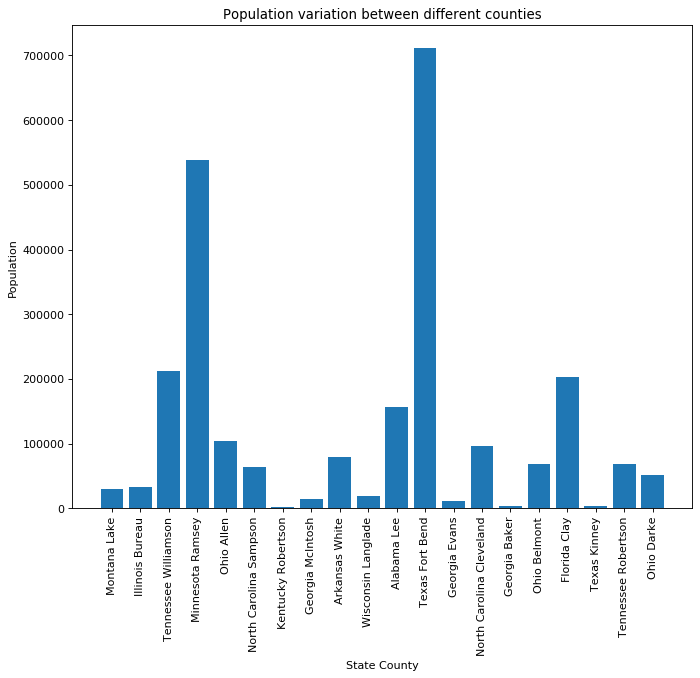

In [109]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

randomdata = data.sample(n=20)
randomdata["County"] = randomdata["state"] + ' ' + randomdata["county"]
plt.bar(np.arange(20),height=randomdata["population"])
plt.xticks(np.arange(20), randomdata["County"])
plt.xticks(rotation='vertical')
plt.title('Population variation between different counties')
plt.xlabel('State County')
plt.ylabel('Population')

### Data Pre-Processing

In [151]:
# Ratio of cases/population, deaths/population
data['cases ratio'] = data['cases']/data['population']
data['deaths ratio'] = data['deaths']/data['population']

# Remove the original two columns of cases and deaths
data.drop(['cases','deaths'],inplace=True,axis=1)
data_org = data

In [134]:
# We find that the absolute values of total population, population aged 60+, residents aged 60+ per icu
# and gdp_dollars number is very high, thus we would like to normalize the all data using z-socre normalization
from scipy import stats

# total population normalization
data['population'] = stats.zscore(data['population'])
data['people aged 60+'] = stats.zscore(data['people aged 60+'])
data['residents aged 60+ per each icu bed'] = stats.zscore(data['residents aged 60+ per each icu bed'])
data['gdp _dollars'] = stats.zscore(data['gdp _dollars'])
data['icu beds'] = stats.zscore(data['icu beds'])
data['%people aged 60+'] = stats.zscore(data['%people aged 60+'])
data['obesity'] = stats.zscore(data['obesity'])
data['heart_disease'] = stats.zscore(data['heart_disease'])
data['COPD'] = stats.zscore(data['COPD'])
data['diabetes'] = stats.zscore(data['diabetes'])
data['CKD'] = stats.zscore(data['CKD'])
data['poverty'] = stats.zscore(data['poverty'])
data['cases ratio'] = stats.zscore(data['cases ratio'])
data['deaths ratio'] = stats.zscore(data['deaths ratio'])

In [135]:
# Check the completed data
pd.options.display.float_format = "{:,.3f}".format
data

,state,county,icu beds,population,people aged 60+,%people aged 60+,residents aged 60+ per each icu bed,gdp _dollars,obesity,heart_disease,COPD,diabetes,CKD,poverty,cases ratio,deaths ratio
0,Alabama,Autauga,-0.204,-0.138,-0.171,-1.056,-0.934,-0.175,0.173,-0.425,-0.217,-0.061,-0.622,0.463,0.647,-0.266
1,Alabama,Baldwin,0.332,0.316,0.533,0.246,-1.128,0.016,-1.193,-0.483,-0.217,-0.394,-0.444,1.378,0.174,-0.420
2,Alabama,Barbour,-0.215,-0.226,-0.243,-0.261,-1.078,-0.206,1.271,1.351,1.278,2.455,1.879,-0.154,-0.339,0.012
3,Alabama,Bibb,-0.275,-0.237,-0.265,-0.695,0.922,-0.221,0.823,-0.024,0.381,0.383,-0.265,-0.210,0.613,0.800
4,Alabama,Blount,-0.204,-0.130,-0.121,-0.242,-0.792,-0.201,-0.230,0.319,0.594,0.161,-0.086,0.489,0.507,0.222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,Wyoming,Sweetwater,-0.156,-0.170,-0.229,-1.653,-1.224,-0.078,-0.319,-1.571,-1.071,-1.541,-1.516,0.284,-0.201,-0.809
2963,Wyoming,Teton,-0.204,-0.236,-0.273,-1.129,-1.220,-0.144,-3.500,-1.973,-1.798,-2.170,-1.873,-0.127,1.819,-1.274
2964,Wyoming,Uinta,-0.204,-0.242,-0.285,-1.418,-1.255,-0.199,-0.185,-0.827,-0.473,-0.986,-0.801,-0.213,0.356,-0.952
2965,Wyoming,Washakie,-0.275,-0.281,-0.307,0.318,0.922,-0.222,-1.484,-0.254,-0.345,-0.653,-0.086,-0.856,0.701,1.538


In [136]:
# Find the correlation between each features
data_train = data.drop(['state','county'],axis=1)
data_train.corr()

,icu beds,population,people aged 60+,%people aged 60+,residents aged 60+ per each icu bed,gdp _dollars,obesity,heart_disease,COPD,diabetes,CKD,poverty,cases ratio,deaths ratio
icu beds,1.000,0.924,0.922,-0.209,-0.328,0.887,-0.214,-0.267,-0.216,-0.146,-0.188,0.527,-0.003,-0.043
population,0.924,1.000,0.988,-0.220,-0.284,0.954,-0.245,-0.296,-0.245,-0.173,-0.218,0.541,-0.024,-0.059
people aged 60+,0.922,0.988,1.000,-0.181,-0.304,0.931,-0.267,-0.281,-0.236,-0.174,-0.208,0.568,-0.044,-0.058
%people aged 60+,-0.209,-0.220,-0.181,1.000,0.315,-0.201,-0.026,0.594,0.320,0.259,0.499,-0.453,-0.285,0.039
residents aged 60+ per each icu bed,-0.328,-0.284,-0.304,0.315,1.000,-0.237,0.197,0.336,0.190,0.220,0.303,-0.680,0.017,0.089
gdp _dollars,0.887,0.954,0.931,-0.201,-0.237,1.000,-0.251,-0.283,-0.243,-0.169,-0.211,0.469,-0.032,-0.055
obesity,-0.214,-0.245,-0.267,-0.026,0.197,-0.251,1.000,0.549,0.575,0.690,0.540,-0.308,0.239,0.256
heart_disease,-0.267,-0.296,-0.281,0.594,0.336,-0.283,0.549,1.000,0.884,0.831,0.892,-0.501,-0.050,0.217
COPD,-0.216,-0.245,-0.236,0.320,0.190,-0.243,0.575,0.884,1.000,0.784,0.727,-0.294,-0.058,0.121
diabetes,-0.146,-0.173,-0.174,0.259,0.220,-0.169,0.690,0.831,0.784,1.000,0.916,-0.328,0.045,0.292


In [137]:
# Since we find that ICU beds, population, population aged 60+ and GDP are very closely correlated.
# We may want to remove some of the attributes in case they would influence the results(redundant)
# We can remove ICU beds, population, population aged 60+ since they are somehow redundant and heavyly influence by county size

data_train.drop(['icu beds','population','people aged 60+'],axis=1,inplace=True)
data_train

,%people aged 60+,residents aged 60+ per each icu bed,gdp _dollars,obesity,heart_disease,COPD,diabetes,CKD,poverty,cases ratio,deaths ratio
0,-1.056,-0.934,-0.175,0.173,-0.425,-0.217,-0.061,-0.622,0.463,0.647,-0.266
1,0.246,-1.128,0.016,-1.193,-0.483,-0.217,-0.394,-0.444,1.378,0.174,-0.420
2,-0.261,-1.078,-0.206,1.271,1.351,1.278,2.455,1.879,-0.154,-0.339,0.012
3,-0.695,0.922,-0.221,0.823,-0.024,0.381,0.383,-0.265,-0.210,0.613,0.800
4,-0.242,-0.792,-0.201,-0.230,0.319,0.594,0.161,-0.086,0.489,0.507,0.222
...,...,...,...,...,...,...,...,...,...,...,...
2962,-1.653,-1.224,-0.078,-0.319,-1.571,-1.071,-1.541,-1.516,0.284,-0.201,-0.809
2963,-1.129,-1.220,-0.144,-3.500,-1.973,-1.798,-2.170,-1.873,-0.127,1.819,-1.274
2964,-1.418,-1.255,-0.199,-0.185,-0.827,-0.473,-0.986,-0.801,-0.213,0.356,-0.952
2965,0.318,0.922,-0.222,-1.484,-0.254,-0.345,-0.653,-0.086,-0.856,0.701,1.538


### Model Building - Clustering

#### PCA

In [138]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Orgininally separate them into 3 groups (High risk, medium and low risk)
pca = PCA(6) # For plotting out the data

#Transform the data
data_pca = pca.fit_transform(data_train)
print(pca.explained_variance_ratio_)

# Almost all the data can be explained by the pca model

[0.43765049 0.15518187 0.13522841 0.08474972 0.06695598 0.03996605]


In [139]:
# Check the shape of the new data
data_pca.shape

(2967, 6)

Text(0.5, 0, 'Number of Component')

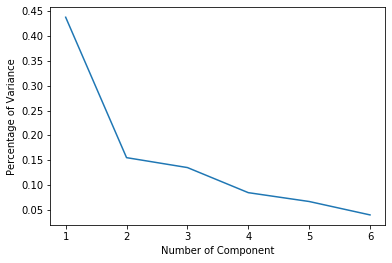

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([1,2,3,4,5,6], pca.explained_variance_ratio_)
plt.ylabel("Percentage of Variance")
plt.xticks(np.arange(1, 7, 1.0))
plt.xlabel("Number of Component")

#### K-means

In [141]:
# We then can apply kmeans to the data
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_pca)
label = kmeans.fit_predict(data_pca)

# Returns the array of cluster labels each data point belongs to
print(label)

[0 2 1 ... 2 0 0]


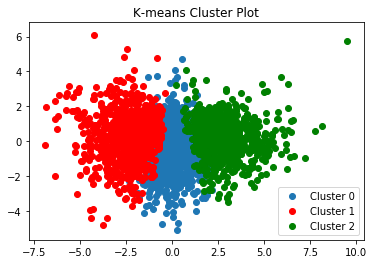

In [142]:
import matplotlib.pyplot as plt

# Visualize the cluster
#filter rows of original data
filtered_label0 = data_pca[label == 0]
filtered_label1 = data_pca[label == 1]
filtered_label2 = data_pca[label == 2]

 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1], label = "Cluster 0")
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red',label="Cluster 1")
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'green',label="Cluster 2")

plt.legend()
plt.title("K-means Cluster Plot")
plt.show()


In [155]:
# We can further check with the 3 groups of labelled data from the original data
# Data distribution 
pd.options.display.float_format = "{:,.5f}".format
data_org[label == 0].drop(['icu beds','population','people aged 60+'],axis=1).describe()

,%people aged 60+,residents aged 60+ per each icu bed,gdp _dollars,obesity,heart_disease,COPD,diabetes,CKD,poverty,cases ratio,deaths ratio
count,"1,354.00000","1,354.00000","1,354.00000","1,354.00000","1,354.00000","1,354.00000","1,354.00000","1,354.00000","1,354.00000","1,354.00000","1,354.00000"
mean,26.11374,"5,996.56795","1,446,460.71935",34.74535,8.49476,8.68663,12.39941,3.36699,9.74006,0.08604,0.00151
std,4.71471,"3,400.71498","2,204,967.91814",3.26832,0.78704,1.34450,1.29902,0.26500,1.21636,0.03029,0.00096
min,11.10000,10.00000,"22,870.00000",22.50000,6.20000,5.30000,8.60000,2.60000,5.02388,0.00592,0.00000
25%,23.10000,"1,720.50000","367,722.50000",32.90000,8.00000,7.70000,11.50000,3.20000,8.95529,0.06848,0.00085
50%,25.70000,"8,470.00000","816,720.00000",35.10000,8.50000,8.65000,12.40000,3.40000,9.83457,0.08666,0.00139
75%,28.77500,"8,470.00000","1,616,676.25000",36.90000,9.00000,9.80000,13.30000,3.50000,10.58998,0.10262,0.00199
max,47.20000,"8,470.00000","28,207,575.00000",44.20000,10.80000,12.10000,17.20000,4.40000,13.52200,0.32934,0.00787


In [156]:
# We can further check with the 3 groups of labelled data
data_org[label == 1].drop(['icu beds','population','people aged 60+'],axis=1).describe()

,%people aged 60+,residents aged 60+ per each icu bed,gdp _dollars,obesity,heart_disease,COPD,diabetes,CKD,poverty,cases ratio,deaths ratio
count,885.00000,885.00000,885.00000,885.00000,885.00000,885.00000,885.00000,885.00000,885.00000,885.00000,885.00000
mean,27.04463,"6,384.05763","751,034.64746",38.40056,10.58734,11.62893,16.21243,4.06972,9.58662,0.08457,0.00186
std,5.66633,"3,302.30599","989,143.24075",3.41257,1.06699,1.81006,1.87266,0.40605,0.93449,0.02782,0.00114
min,9.50000,188.00000,"24,009.00000",27.40000,7.70000,6.70000,12.40000,3.20000,6.08677,0.01209,0.00000
25%,23.50000,"1,953.00000","226,329.00000",36.20000,9.80000,10.40000,14.90000,3.80000,9.02642,0.06602,0.00104
50%,26.10000,"8,470.00000","436,639.00000",38.40000,10.40000,11.40000,15.80000,4.00000,9.61052,0.08220,0.00171
75%,29.70000,"8,470.00000","861,213.00000",40.40000,11.20000,12.60000,17.10000,4.30000,10.15580,0.10256,0.00249
max,64.20000,"8,470.00000","10,373,362.00000",49.90000,15.10000,19.90000,25.60000,5.90000,12.94810,0.24330,0.00836


In [157]:
# We can further check with the 3 groups of labelled data
data_org[label == 2].drop(['icu beds','population','people aged 60+'],axis=1).describe()

,%people aged 60+,residents aged 60+ per each icu bed,gdp _dollars,obesity,heart_disease,COPD,diabetes,CKD,poverty,cases ratio,deaths ratio
count,728.00000,728.00000,728.00000,728.00000,728.00000,728.00000,728.00000,728.00000,728.00000,728.00000,728.00000
mean,20.20179,"2,002.70742","19,805,858.14148",31.44684,6.55330,6.82953,10.47706,2.84409,11.91267,0.08153,0.00111
std,3.73496,"2,355.58310","46,020,234.15108",4.52426,0.93677,1.32629,1.67482,0.31548,1.20151,0.02773,0.00058
min,5.80000,137.00000,"266,634.00000",15.20000,3.50000,3.50000,6.10000,1.80000,8.70732,0.00255,0.00000
25%,17.60000,707.25000,"2,813,082.75000",28.70000,5.90000,5.90000,9.40000,2.60000,11.06904,0.06440,0.00066
50%,20.20000,"1,117.00000","6,192,079.50000",31.90000,6.60000,6.80000,10.40000,2.90000,11.90432,0.08252,0.00103
75%,22.60000,"1,965.00000","17,299,159.25000",34.40000,7.20000,7.80000,11.60000,3.10000,12.68437,0.09822,0.00148
max,37.70000,"8,470.00000","726,943,301.00000",44.20000,9.30000,10.50000,17.20000,4.00000,16.11322,0.24135,0.00317


#### Hierachical Clustering

In [158]:
from sklearn.cluster import AgglomerativeClustering

hierachy = AgglomerativeClustering().fit(data_pca)
label_h = hierachy.fit_predict(data_pca)
print(label_h)

### We find that for hierachical clustering, it only classify as two clusters, so we change it to two clusters

[0 0 1 ... 0 1 0]


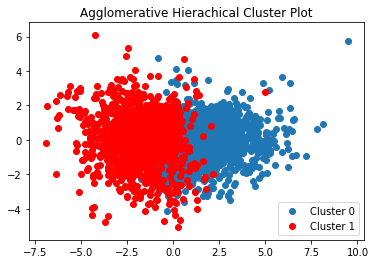

In [159]:
# Visualize the cluster
#filter rows of original data
filtered_label0_h = data_pca[label_h == 0]
filtered_label1_h = data_pca[label_h == 1]

 
#plotting the results
plt.scatter(filtered_label0_h[:,0] , filtered_label0_h[:,1], label = "Cluster 0")
plt.scatter(filtered_label1_h[:,0] , filtered_label1_h[:,1] , color = 'red',label="Cluster 1")


plt.legend()
plt.title("Agglomerative Hierachical Cluster Plot")
plt.show()

In [160]:
# We can further check with the 3 groups of labelled data from the original data
data_org[label_h == 0].drop(['icu beds','population','people aged 60+'],axis=1).describe()

,%people aged 60+,residents aged 60+ per each icu bed,gdp _dollars,obesity,heart_disease,COPD,diabetes,CKD,poverty,cases ratio,deaths ratio
count,"1,527.00000","1,527.00000","1,527.00000","1,527.00000","1,527.00000","1,527.00000","1,527.00000","1,527.00000","1,527.00000","1,527.00000","1,527.00000"
mean,23.00897,"3,909.06549","10,211,064.49247",33.07184,7.43707,7.64001,11.27950,3.07682,10.80798,0.08153,0.00123
std,4.78046,"3,505.98473","33,082,645.71058",4.03206,1.18223,1.50022,1.64141,0.36012,1.59548,0.02620,0.00069
min,8.80000,10.00000,"26,511.00000",15.20000,3.80000,3.50000,6.10000,1.90000,5.02388,0.00255,0.00000
25%,19.60000,931.00000,"822,722.00000",30.90000,6.60000,6.60000,10.20000,2.80000,9.79515,0.06456,0.00073
50%,22.80000,"1,808.00000","2,050,482.00000",33.60000,7.60000,7.60000,11.40000,3.10000,10.77966,0.08323,0.00114
75%,26.20000,"8,470.00000","6,265,293.00000",35.90000,8.30000,8.70000,12.40000,3.30000,11.87987,0.09862,0.00164
max,39.20000,"8,470.00000","726,943,301.00000",44.20000,10.80000,12.00000,18.00000,4.40000,16.11322,0.17223,0.00452


In [161]:
# We can further check with the 3 groups of labelled data from the original data
data_org[label_h == 1].drop(['icu beds','population','people aged 60+'],axis=1).describe()

,%people aged 60+,residents aged 60+ per each icu bed,gdp _dollars,obesity,heart_disease,COPD,diabetes,CKD,poverty,cases ratio,deaths ratio
count,"1,440.00000","1,440.00000","1,440.00000","1,440.00000","1,440.00000","1,440.00000","1,440.00000","1,440.00000","1,440.00000","1,440.00000","1,440.00000"
mean,26.98938,"6,429.21667","1,006,626.89167",37.09882,9.92090,10.66590,14.95854,3.84222,9.61170,0.08764,0.00182
std,5.53678,"3,269.82119","1,903,426.61826",3.93765,1.27299,2.04956,2.28639,0.45470,1.06454,0.03141,0.00114
min,5.80000,188.00000,"22,870.00000",22.10000,3.50000,4.50000,6.70000,1.80000,6.08677,0.00592,0.00000
25%,23.40000,"2,161.75000","248,979.25000",35.10000,9.10000,9.40000,13.50000,3.50000,8.98778,0.06826,0.00100
50%,26.10000,"8,470.00000","506,228.00000",37.30000,9.80000,10.60000,14.80000,3.80000,9.65566,0.08485,0.00168
75%,29.80000,"8,470.00000","1,035,162.50000",39.40000,10.70000,11.80000,16.20000,4.10000,10.25885,0.10496,0.00244
max,64.20000,"8,470.00000","28,207,575.00000",49.90000,15.10000,19.90000,25.60000,5.90000,13.52200,0.32934,0.00836


#### DBSCAN

In [228]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=3).fit(data_pca)
label_d = dbscan.fit_predict(data_pca)
print(label_d)

[0 0 0 ... 0 0 0]


In [229]:
np.unique(label_d)
# Tried eps = 3,4,5,6,7,8 but the results are not ideal, the size of groups are not balanced when group number is 2 or 3, 
# but when group number is 5, it is hard to compare with other two cluster methods. It is estimated that DBSCAN mechanism is
# not suitable for the data in this case. From eye checking, it seems like K-means method is the best for the case

array([-1,  0,  1], dtype=int64)

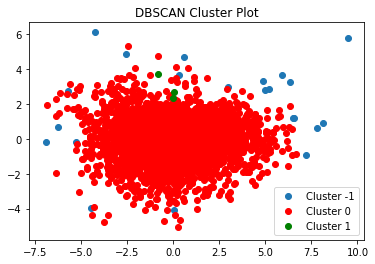

In [230]:
# Visualize the cluster
#filter rows of original data
filtered_label0_d = data_pca[label_d == -1]
filtered_label1_d = data_pca[label_d == 0]
filtered_label2_d = data_pca[label_d == 1]
 
#plotting the results
plt.scatter(filtered_label0_d[:,0] , filtered_label0_d[:,1], label = "Cluster -1")
plt.scatter(filtered_label1_d[:,0] , filtered_label1_d[:,1] , color = 'red',label="Cluster 0")
plt.scatter(filtered_label2_d[:,0] , filtered_label2_d[:,1] , color = 'green',label="Cluster 1")

plt.legend()
plt.title("DBSCAN Cluster Plot")
plt.show()

In [175]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=7, min_samples=2).fit(data_pca)
label_d = dbscan.fit_predict(data_pca)
print(label_d)

[0 0 0 ... 0 0 0]


In [176]:
np.unique(label_d)

array([-1,  0], dtype=int64)

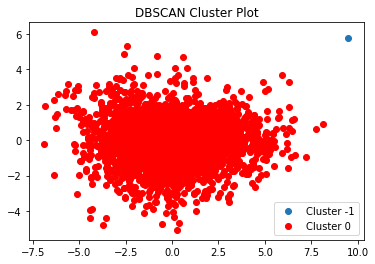

In [177]:
# Visualize the cluster
#filter rows of original data
filtered_label0_d = data_pca[label_d == -1]
filtered_label1_d = data_pca[label_d == 0]
 
#plotting the results
plt.scatter(filtered_label0_d[:,0] , filtered_label0_d[:,1], label = "Cluster -1")
plt.scatter(filtered_label1_d[:,0] , filtered_label1_d[:,1] , color = 'red',label="Cluster 0")

plt.legend()
plt.title("DBSCAN Cluster Plot")
plt.show()

### Model Building - Supervised Learning

In [178]:
# Separate data into training data and testing data
from sklearn.model_selection import train_test_split

# Kmeans
X_train, X_test, y_train, y_test = train_test_split(data_train, label, test_size=0.2, random_state=42)

# Hierarchical clustering
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(data_train, label_h, test_size=0.2, random_state=42)

#### KNN

In [191]:
# After building up the clustering method, we can build up supervised learning models
# The methods that would use is KNN, DT,RF. And DBSCAN would not be used in the models

### KNN + KMEANS 
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Create the classifier
knn = KNeighborsClassifier(n_neighbors=3)

#knn.fit(X_train, y_train) # Fit the model
knn_results = cross_validate(knn, data_train, label, cv=5)

# KNN prediction using cross data
y_pred = cross_val_predict(knn, data_train, label, cv=5)

# Classification report
print(classification_report(label, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1354
           1       0.93      0.93      0.93       885
           2       0.96      0.93      0.95       728

    accuracy                           0.93      2967
   macro avg       0.94      0.93      0.93      2967
weighted avg       0.93      0.93      0.93      2967



In [192]:
knn_results

{'fit_time': array([0.00399137, 0.0059824 , 0.00299311, 0.00398898, 0.00299048]),
 'score_time': array([0.04587507, 0.03889537, 0.03789806, 0.04986787, 0.0428865 ]),
 'test_score': array([0.92929293, 0.93939394, 0.93097643, 0.92917369, 0.93581081])}

In [193]:
### KNN + Hierarchical clustering

# Create the classifier
knn_h = KNeighborsClassifier(n_neighbors=2)
knn_h_results = cross_validate(knn_h, data_train, label_h, cv=5)
#knn_h.fit(X_train_h, y_train_h)

# KNN prediction using test data
#y_pred_h = knn_h.predict(X_test_h)
y_pred_h = cross_val_predict(knn_h, data_train, label_h, cv=5)

# Classification report
print(classification_report(label_h, y_pred_h))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1527
           1       0.99      0.90      0.94      1440

    accuracy                           0.94      2967
   macro avg       0.95      0.94      0.94      2967
weighted avg       0.95      0.94      0.94      2967



In [194]:
knn_h_results

{'fit_time': array([0.07384348, 0.00299239, 0.0039618 , 0.00299096, 0.00299287]),
 'score_time': array([0.04882383, 0.03792548, 0.03391075, 0.03390741, 0.03390861]),
 'test_score': array([0.95286195, 0.9040404 , 0.94097808, 0.97301855, 0.94266442])}

#### Decision Tree

In [196]:
### Decision Tree + KMEANS 
from sklearn import tree

# Create the classifier
clf = tree.DecisionTreeClassifier()
#clf.fit(X_train, y_train)
clf_results = cross_validate(clf, data_train, label, cv=5)

# Tree prediction using test data
#y_pred = clf.predict(X_test)
y_pred = cross_val_predict(clf, data_train, label, cv=5)

# Classification report
print(classification_report(label, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1354
           1       0.92      0.94      0.93       885
           2       0.91      0.92      0.92       728

    accuracy                           0.92      2967
   macro avg       0.92      0.92      0.92      2967
weighted avg       0.92      0.92      0.92      2967



In [197]:
clf_results

{'fit_time': array([0.02393007, 0.02493596, 0.01897144, 0.01592636, 0.01598454]),
 'score_time': array([0.00099492, 0.00099874, 0.00099754, 0.00099802, 0.00099659]),
 'test_score': array([0.88888889, 0.93434343, 0.93097643, 0.89544688, 0.9222973 ])}

In [198]:
### Decision Tree + Hierarchical Clustering
from sklearn import tree

# Create the classifier
clf_h = tree.DecisionTreeClassifier()
#clf.fit(X_train_h, y_train_h)
clf_h_results = cross_validate(clf_h, data_train, label_h, cv=5)

# Tree prediction using test data
#y_pred_h = clf.predict(X_test_h)
y_pred_h = cross_val_predict(clf_h, data_train, label_h, cv=5)

# Classification report
print(classification_report(label_h, y_pred_h))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1527
           1       0.88      0.90      0.89      1440

    accuracy                           0.89      2967
   macro avg       0.89      0.89      0.89      2967
weighted avg       0.89      0.89      0.89      2967



In [199]:
clf_h_results

{'fit_time': array([0.08177829, 0.03091574, 0.02496195, 0.02091098, 0.01595664]),
 'score_time': array([0.00199485, 0.0019958 , 0.00099683, 0.00099921, 0.00202465]),
 'test_score': array([0.8989899 , 0.87037037, 0.89376054, 0.88532884, 0.90725126])}

#### Random Forest

In [201]:
import warnings
warnings.filterwarnings('ignore')

In [202]:
### Random Forest + KMEANS 
from sklearn.ensemble import RandomForestClassifier

# Create the classifier
rf = RandomForestClassifier(random_state=0)
#rf.fit(X_train, y_train)
rf_results = cross_validate(rf, data_train, label, cv=5)

# Tree prediction using test data
# y_pred = rf.predict(X_test)
y_pred = cross_val_predict(rf, data_train, label, cv=5)

# Classification report
print(classification_report(label, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1354
           1       0.97      0.94      0.95       885
           2       0.94      0.93      0.93       728

    accuracy                           0.94      2967
   macro avg       0.94      0.94      0.94      2967
weighted avg       0.94      0.94      0.94      2967



In [203]:
rf_results

{'fit_time': array([0.13164783, 0.03989124, 0.03889632, 0.03789902, 0.03991199]),
 'score_time': array([0.00299239, 0.00199556, 0.00299168, 0.00299954, 0.00199533]),
 'test_score': array([0.93434343, 0.94444444, 0.94612795, 0.9460371 , 0.92905405])}

In [204]:
### Random Forest + Hierarchical clustering

# Create the classifier
rf_h = RandomForestClassifier(random_state=0)
#rf.fit(X_train_h, y_train_h)
rf_h_results = cross_validate(rf, data_train, label_h, cv=5)

# Tree prediction using test data
# y_pred_h = rf.predict(X_test_h)
y_pred_h = cross_val_predict(rf_h, data_train, label_h, cv=5)

# Classification report
print(classification_report(label_h, y_pred_h))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1527
           1       0.95      0.89      0.91      1440

    accuracy                           0.92      2967
   macro avg       0.92      0.92      0.92      2967
weighted avg       0.92      0.92      0.92      2967



In [205]:
rf_h_results

{'fit_time': array([0.17253971, 0.05485368, 0.04088998, 0.036901  , 0.03689981]),
 'score_time': array([0.00498319, 0.00299025, 0.00199509, 0.01296663, 0.00299454]),
 'test_score': array([0.94781145, 0.87710438, 0.91736931, 0.93591906, 0.91905565])}

#### Logistic Regression

In [212]:
from sklearn.linear_model import LogisticRegression

### Logistic Regression + KMEANS 

# Create the classifier
lr = LogisticRegression(random_state=0)
#lr.fit(X_train, y_train)
lr_results = cross_validate(lr, data_train, label, cv=5)

# Tree prediction using test data
# y_pred = lr.predict(X_test)
y_pred = cross_val_predict(lr, data_train, label, cv=5)

# Classification report
print(classification_report(label, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1354
           1       0.94      0.98      0.96       885
           2       0.95      0.96      0.95       728

    accuracy                           0.95      2967
   macro avg       0.95      0.96      0.95      2967
weighted avg       0.95      0.95      0.95      2967



In [213]:
lr_results

{'fit_time': array([0.01994801, 0.02489781, 0.01891732, 0.01898217, 0.01591587]),
 'score_time': array([0.00099516, 0.00102901, 0.00099826, 0.00100327, 0.00099754]),
 'test_score': array([0.93265993, 0.96801347, 0.96464646, 0.95784148, 0.94594595])}

In [220]:
# We select this method as the best method
# Check the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(label, y_pred,labels=[0,1,2])

array([[1263,   54,   37],
       [  15,  870,    0],
       [  31,    0,  697]], dtype=int64)

In [209]:
### Logistic Regression + Hierarchical clustering

# Create the classifier
lr_h = LogisticRegression(random_state=0)
#lr.fit(X_train_h, y_train_h)
lr_h_results = cross_validate(lr_h, data_train, label_h, cv=5)

# Tree prediction using test data
# y_pred = lr.predict(X_test_h)
y_pred_h = cross_val_predict(lr_h, data_train, label_h, cv=5)

# Classification report
print(classification_report(label_h, y_pred_h))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1527
           1       0.90      0.88      0.89      1440

    accuracy                           0.89      2967
   macro avg       0.89      0.89      0.89      2967
weighted avg       0.89      0.89      0.89      2967



In [210]:
lr_h_results

{'fit_time': array([0.01595616, 0.00997376, 0.00797486, 0.00698066, 0.00698137]),
 'score_time': array([0.00399375, 0.00099969, 0.00099778, 0.00099778, 0.00099707]),
 'test_score': array([0.89393939, 0.86868687, 0.8920742 , 0.9005059 , 0.91568297])}